In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import sys

In [2]:
# Define functions
def calculate_distribution(df, bin_size):
    df['length'] = df['feedback_content'].apply(len)
    df['length_bin'] = (df['length'] // bin_size) * bin_size
    length_distribution = df['length_bin'].value_counts().reset_index()
    length_distribution.columns = ['length_bin', 'frequency']
    return length_distribution

def plot_feedback_length_distribution(length_distribution, bin_size):
    plt.figure(figsize=(10, 6))
    plt.bar(length_distribution['length_bin'], length_distribution['frequency'], width=bin_size)
    plt.xlabel('Feedback Length')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Feedback Length (bin size = {bin_size})')
    plt.grid(True)
    plt.show()

def plot_pie_chart(df, column, title, threshold):
    # Calculate percentages
    data = df[column].value_counts(normalize=True) * 100
    # Group small percentages into 'Other'
    large_data = data[data >= threshold]
    small_data_sum = data[data < threshold].sum()
    if small_data_sum > 0:
        data = pd.concat([large_data, pd.Series([small_data_sum], index=['Other'])])
    # Plot pie chart
    fig, ax = plt.subplots(figsize=(9, 6))
    sizes = data.values
    labels = data.index
    # Create a pie chart without labels
    wedges, _ = ax.pie(
        sizes, startangle=140, 
        colors=plt.cm.Paired(range(len(data))),
        wedgeprops=dict(width=0.4)
    )
    # Create a table with labels and percentages
    label_pct = [f'{label}: {size:.1f}%' for label, size in zip(labels, sizes)]
    
    plt.gca().legend(
        wedges, label_pct, title=column.capitalize(), loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1), fontsize='small'
    )
    plt.title(title)
    plt.show()

def load_data(topic, SRC_DIR):
    data_dir = os.path.join(SRC_DIR, 'data', topic)
    csv_path = os.path.join(data_dir, 'processed_data.csv')
    
    df = pd.read_csv(csv_path)
    return df

def combine_all_data(topics, SRC_DIR):
    all_data = pd.DataFrame()
    for topic in topics:
        df = load_data(topic, SRC_DIR)
        all_data = pd.concat([all_data, df], ignore_index=True)
    return all_data
    


### Plot bar chart of feedback length distribution, plot pie chart of feedback country and language distribution

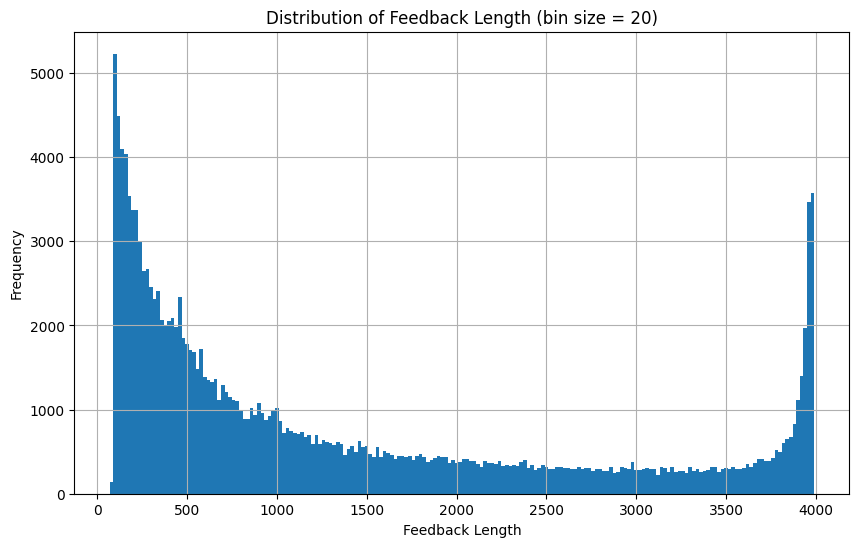

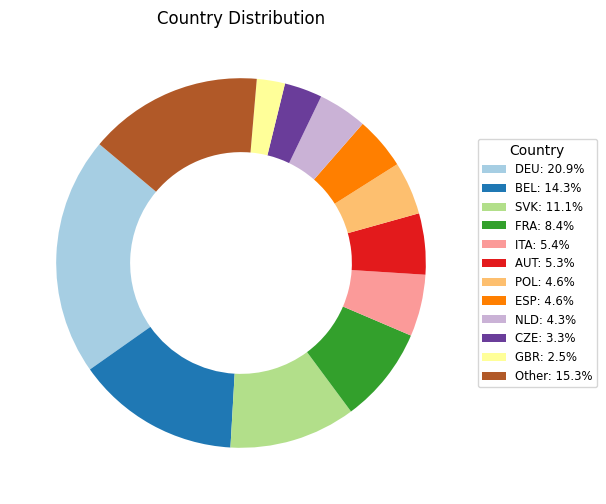

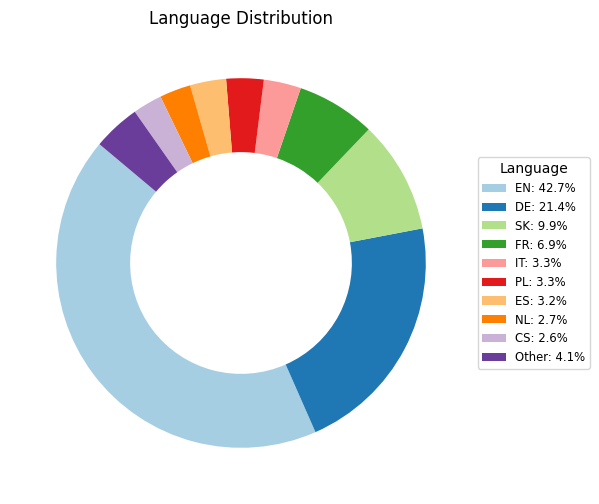

In [7]:
topic_list = ['AGRI', 'FINANCE', 'BUDGET', 'BUSINESS', 'CLIMA', 'COMP', 
              'CONSUM', 'CULT', 'CUSTOMS', 'DIGITAL', 'ECFIN', 'EAC', 
              'EMPL', 'ENER', 'ENV', 'ENLARG', 'NEIGHBOUR', 'FOOD', 'FOREIGN', 
              'FRAUD', 'HOME', 'HUMAN', 'INST', 'INTDEV', 'JUST', 'MARE', 'ASYL', 
              'HEALTH', 'REGIO', 'RESEARCH', 'SINGMARK', 'SPORT', 'STAT', 'TAX', 
              'TRADE', 'TRANSPORT', 'YOUTH']
bin_size = 20
SRC_DIR = 'D:/visualstudiocode/project/eufeedbackapp/src'

# Load and combine all data
all_data = combine_all_data(topic_list, SRC_DIR)
# save all_data to csv
all_data.to_csv(os.path.join(SRC_DIR, 'data', 'all_data.csv'), index=False)

# Calculate distribution
length_distribution = calculate_distribution(all_data, bin_size)

# Plot the distribution
plot_feedback_length_distribution(length_distribution, bin_size)
plot_pie_chart(all_data, 'country', 'Country Distribution', 2.2)
plot_pie_chart(all_data, 'language', 'Language Distribution', 1.5)


In [6]:
print(all_data.head())
print(len(all_data))

      id                                        short_title  \
0  14081  Streamlining and improvement of price notifica...   
1  12970  Review of the EU school fruit, vegetables and ...   
2  12970  Review of the EU school fruit, vegetables and ...   
3  12970  Review of the EU school fruit, vegetables and ...   
4  12970  Review of the EU school fruit, vegetables and ...   

                                    feedback_content  feedback_id country  \
0  hello, i'm a bit confused by this deleguated r...      3466736     BEL   
1  oatly welcomes the opportunity to submit feedb...      2663238     SWE   
2  i support the promotion of fruit and vegetable...      2663226     GBR   
3  in the attached document, animal law europe br...      2663211     BEL   
4  lav accoglie con favore la revisione del progr...      2663193     ITA   

  language        feedback_date  length  length_bin  
0       EN  2024/05/23 13:33:34    1849        1840  
1       EN  2021/07/27 23:32:48    1842        184